In [1]:
# imports
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import Image

(60, 225)

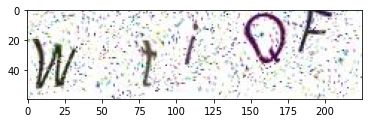

In [59]:
# preprocess image: noise filtering, black&white, 
image = np.array(Image.open(r"captchas/49520.jpeg"))
plt.imshow(image)
image = cv2.blur(image, (3, 3))
ret, image = cv2.threshold(image, 190, 255, cv2.THRESH_BINARY)
image = cv2.dilate(image, np.ones((3,1), np.uint8))
image = cv2.erode(image, np.ones((2,2), np.uint8))
image = image.mean(axis=2)
image.shape

In [60]:
# split letters by x-axis
columns = image.mean(axis=0)
# filter: "1" where not pure white
columns = np.where(columns<255, 1, 0)

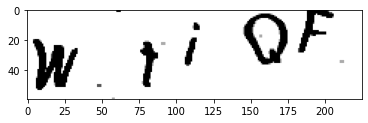

In [61]:
plt.imshow(image, cmap="gray")

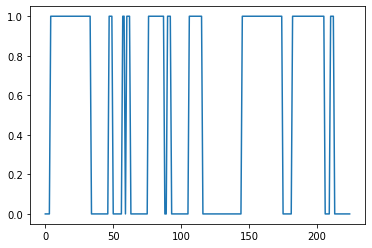

In [62]:
# plot columns
plt.plot(range(columns.shape[0]), list(columns))

In [63]:
# split letters on x-axis
columns_ext = np.concatenate(([0],columns,[0]))
diffs = np.diff((columns_ext==1).astype(int))
starts = np.argwhere(diffs == 1)
stops = np.argwhere(diffs == -1)

intvs = stops - starts

letters = []
for intv in enumerate(intvs):
    i = intv[0]
    value = intv[1][0]
    if value > 6:
        letter = image[:,starts[i][0]:stops[i][0]]
        letters.append(letter)

In [64]:
def crop_letter_vertical(letter):
    rows = letter.mean(axis=1)
    rows = np.where(rows<253,1,0)
    rows_ext = np.concatenate(([0],rows,[0]))
    diffs = np.diff((rows_ext==1).astype(int))
    
    starts = np.argwhere(diffs == 1)
    stops = np.argwhere(diffs == -1)
    intvs = stops - starts
    
    points = []

    for intv in enumerate(intvs):
        i = intv[0]
        value = intv[1][0]
        if value > 2:
            points.append(starts[i][0])
            points.append(stops[i][0])
    return letter[points[0]:points[-1]]

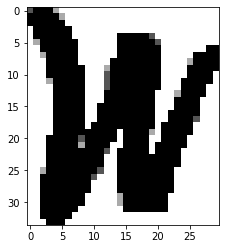

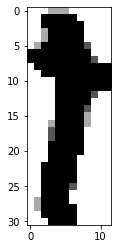

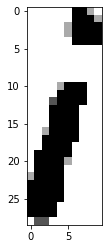

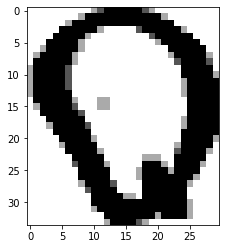

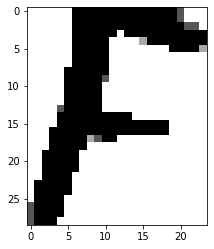

In [65]:

for letter in letters:
    output = crop_letter_vertical(letter)
    #output = cv2.resize(output, (25,30))
    plt.figure()
    plt.imshow(output, cmap="gray")